In [38]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
img = cv2.imread('test_images/wanindu1.jpeg')
img.shape

(220, 349, 3)

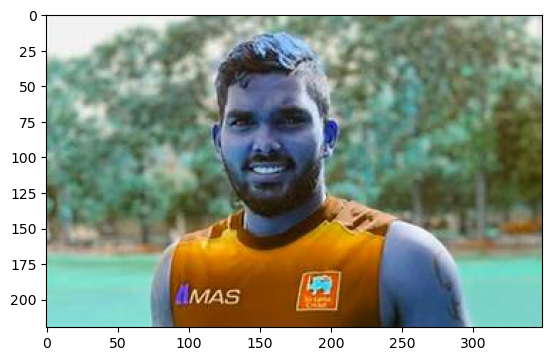

In [40]:
plt.imshow(img)

In [41]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(220, 349)

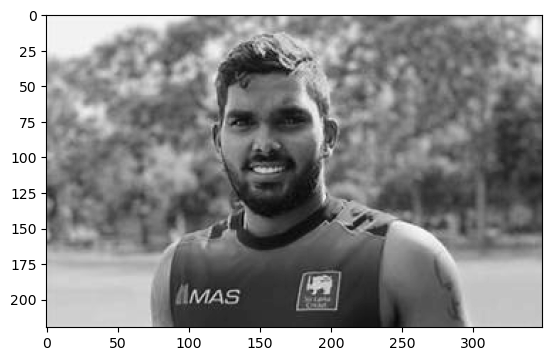

In [42]:
plt.imshow(gray , cmap='gray')

In [43]:
# Detecting face and eyes ( Haar cascade)

In [44]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[114,  46,  80,  80]])

In [45]:
# This above array have 4 values . first one is x,y,  width adn heigth.
# Thats means this image's face is starting from 352 - x axis, 38 y-axis. and it has  233 heigth and 233 width

In [46]:
(x,y,w,h) = faces[0]
x,y,w,h

(114, 46, 80, 80)

In [47]:
# Drawing rectangle arround the face using opencv to sepreate it

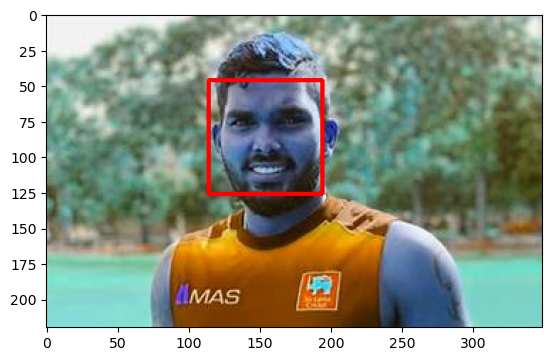

In [48]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

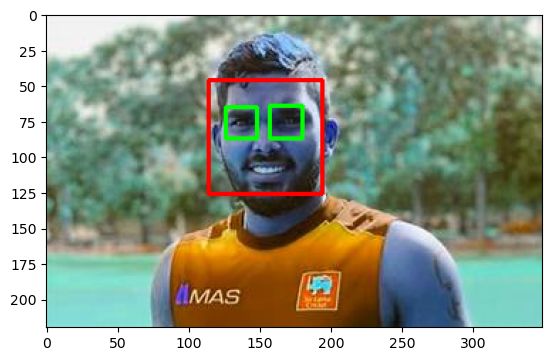

In [49]:

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

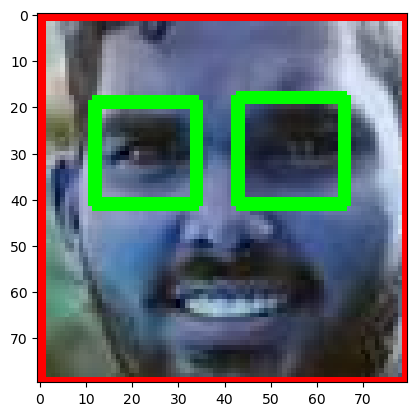

In [50]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [51]:
cropped_img = np.array(roi_color)
cropped_img.shape

(80, 80, 3)

In [52]:
# In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [53]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

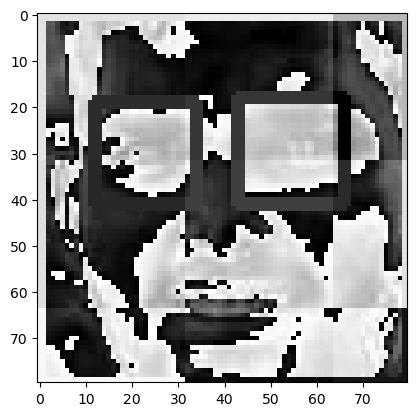

In [54]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [55]:
# Crop the facial region of the images using function

In [56]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

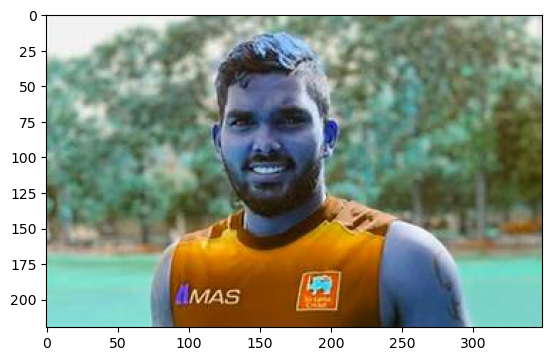

In [57]:
original_image = cv2.imread('test_images/wanindu1.jpeg')
plt.imshow(original_image)

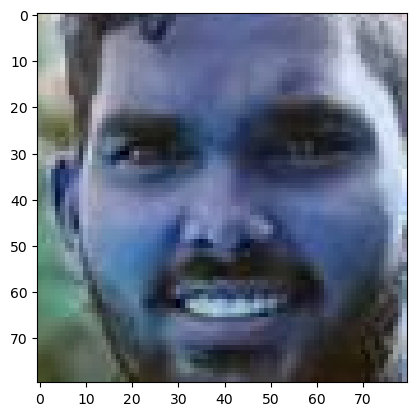

In [58]:
cropped_images = get_cropped_image_if_2_eyes('test_images/wanindu1.jpeg')
plt.imshow(cropped_images)

In [59]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [60]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [61]:
img_dirs

['./dataset/dasun_shanaka',
 './dataset/kusal_mendis',
 './dataset/mahesh_thekshana',
 './dataset/pathum_nissanka',
 './dataset/wanindu_hasaranga']

In [62]:
#Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [63]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/dasun_shanaka
Generating cropped images in folder:  ./dataset/cropped/kusal_mendis
Generating cropped images in folder:  ./dataset/cropped/mahesh_thekshana
Generating cropped images in folder:  ./dataset/cropped/pathum_nissanka
Generating cropped images in folder:  ./dataset/cropped/wanindu_hasaranga


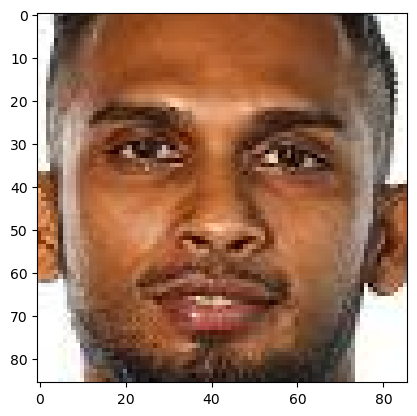

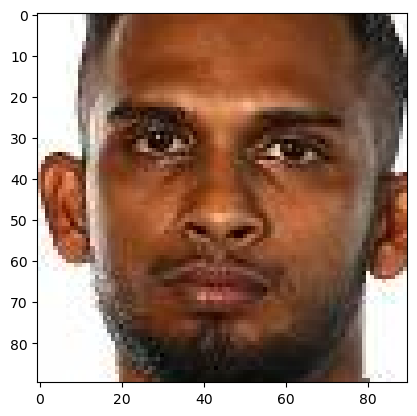

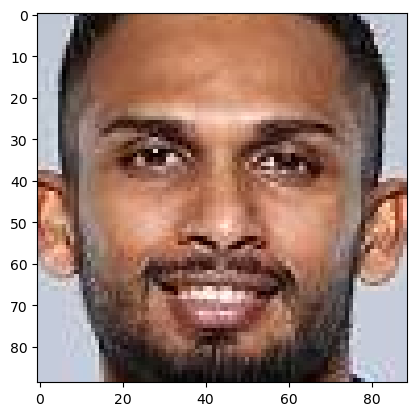

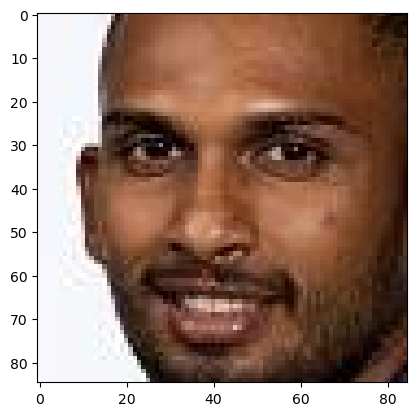

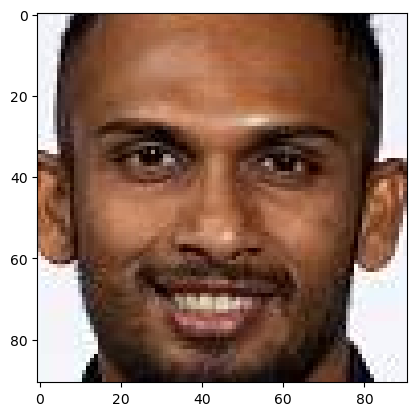

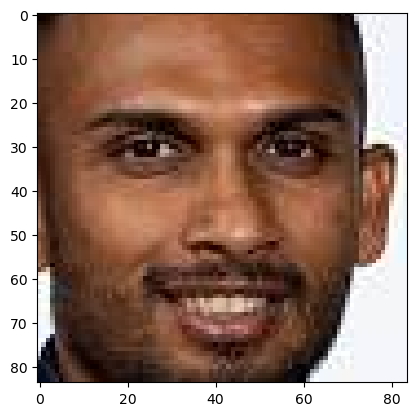

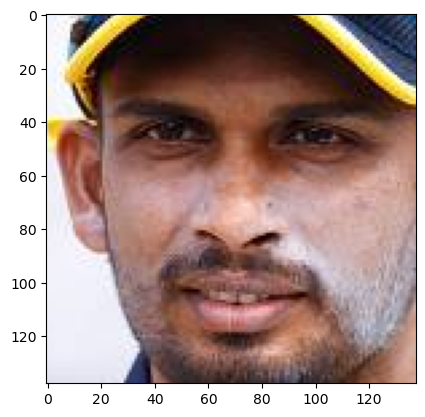

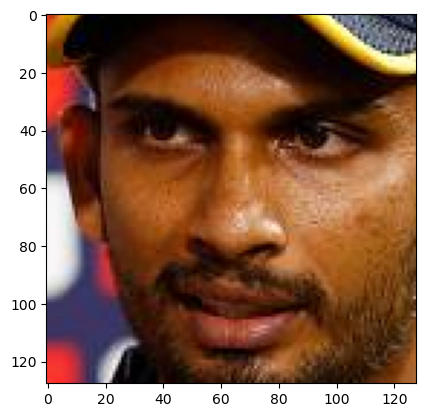

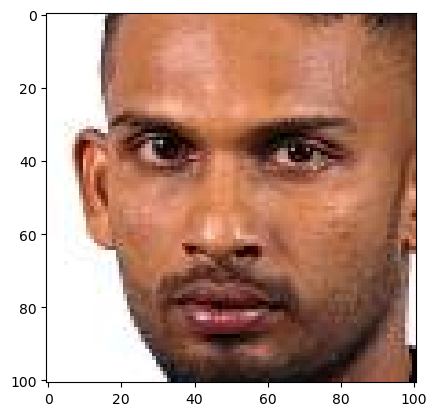

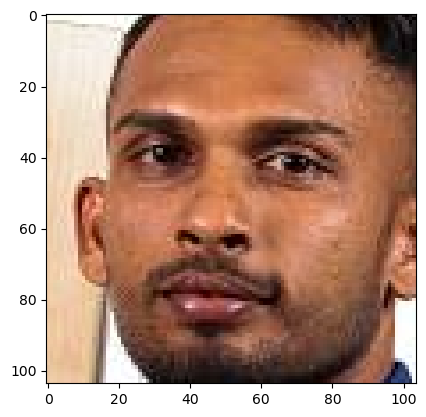

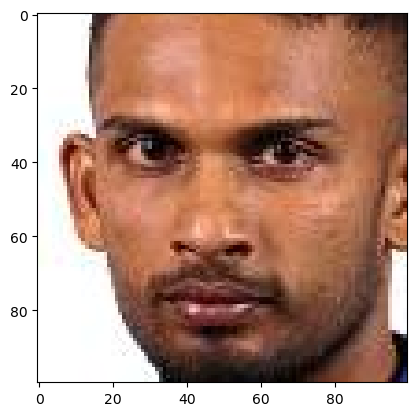

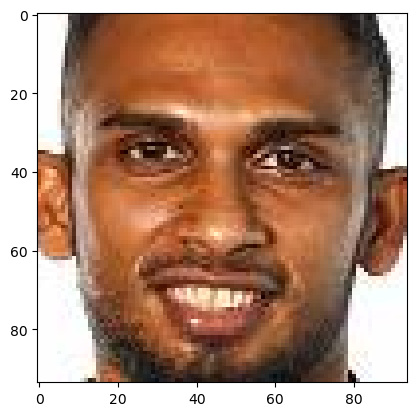

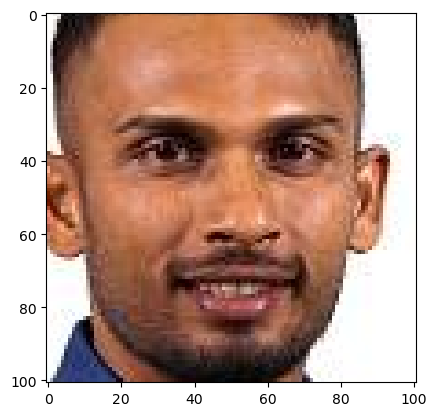

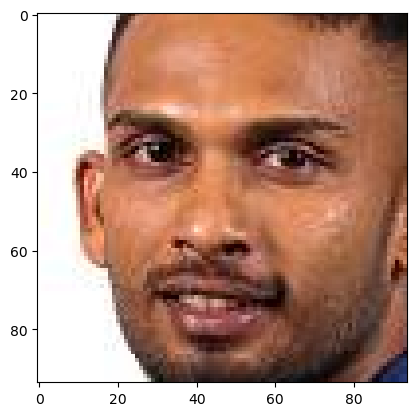

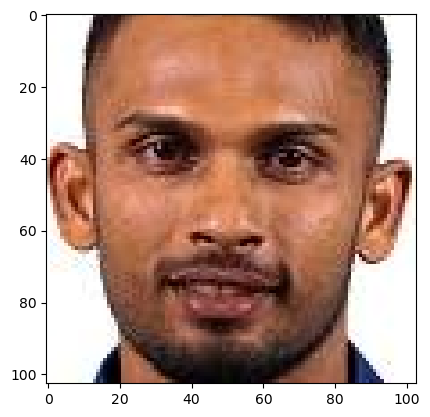

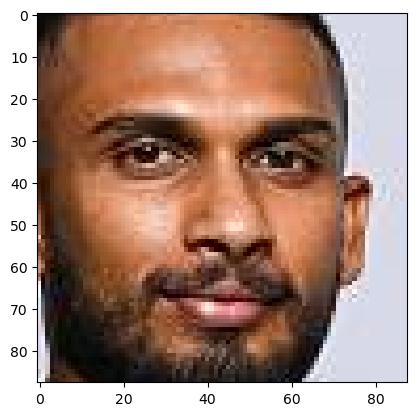

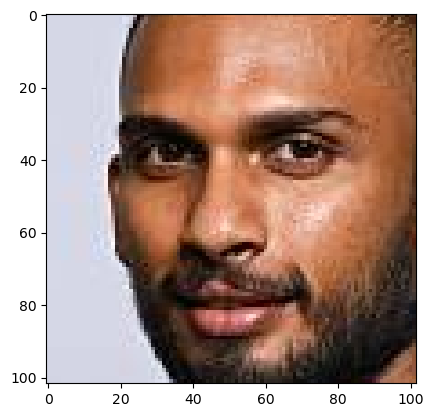

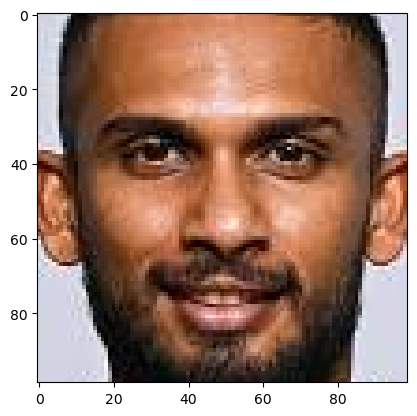

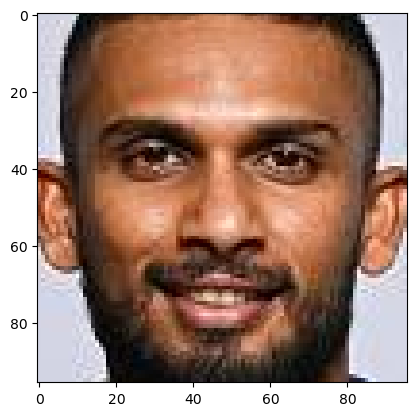

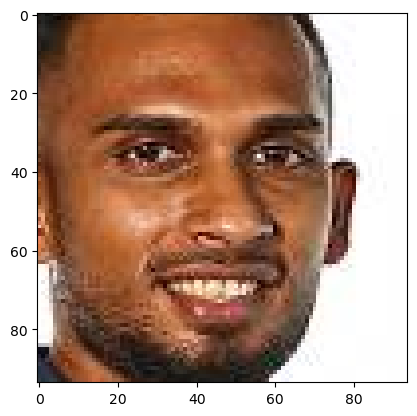

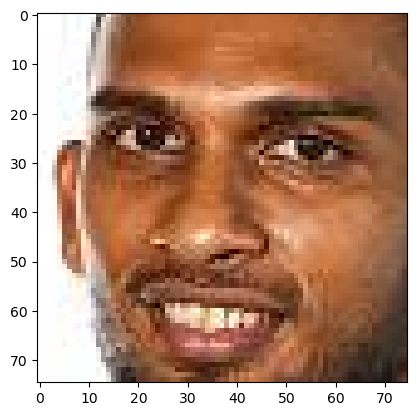

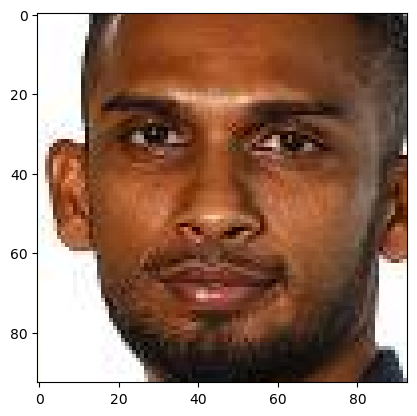

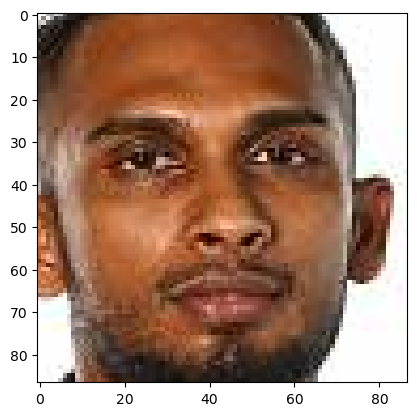

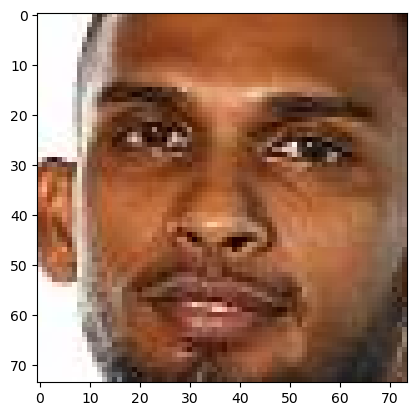

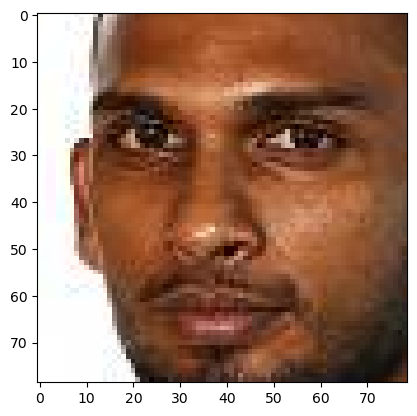

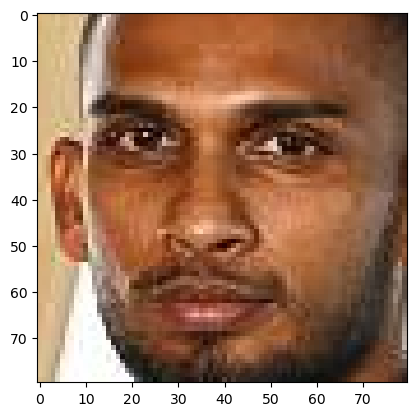

In [64]:

img_dir = 'dataset/cropped/dasun_shanaka'

# Get the list of image files in the directory
img_files = os.listdir(img_dir)

# Iterate over the image files and display them
for img_file in img_files:
    # Construct the path to the image file
    img_path = os.path.join(img_dir, img_file)
    
    # Read and display the image
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.show()


In [65]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'dasun_shanaka': ['./dataset/cropped/dasun_shanaka\\dasun_shanaka1.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka10.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka11.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka12.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka13.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka14.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka15.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka16.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka17.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka18.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka19.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka2.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka20.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka21.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka22.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka23.png',
  './dataset/cropped/dasun_shanaka\\dasun_shanaka24.png',

In [66]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'dasun_shanaka': 0,
 'kusal_mendis': 1,
 'mahesh_thekshana': 2,
 'pathum_nissanka': 3,
 'wanindu_hasaranga': 4}

In [67]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [68]:
len(X[0])

4096

In [69]:
32*32*3 + 32*32

4096

In [70]:
X[0]

array([[249],
       [249],
       [249],
       ...,
       [ 63],
       [ 63],
       [ 63]], dtype=uint8)

In [71]:
y[0]

0

In [72]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(124, 4096)

In [73]:
# data preprocessing and cleaning done. Now training the model

In [74]:
# We will use SVM with rbf kernel tuned  with heuristic finetuning

In [80]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9354838709677419

In [82]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         3
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.95      0.96      0.95        31
weighted avg       0.94      0.94      0.94        31



In [83]:
# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [87]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [88]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.946784,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.793567,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.956725,{'logisticregression__C': 1}


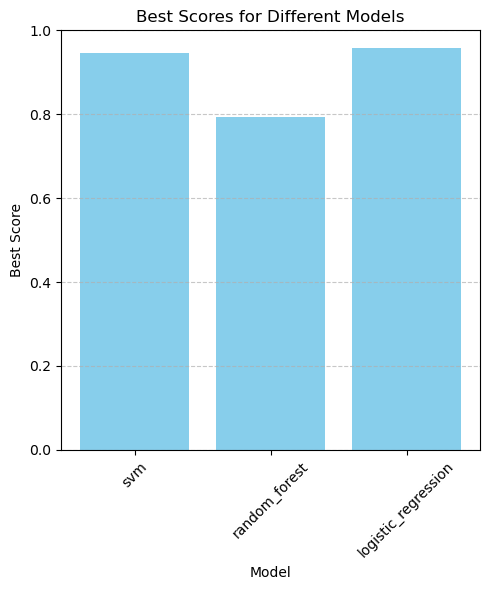

In [94]:
import matplotlib.pyplot as plt

# Plotting the best scores
plt.figure(figsize=(5, 6))
plt.bar(df['model'], df['best_score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Best Scores for Different Models')
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [96]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [97]:
best_estimators['svm'].score(X_test,y_test)

0.967741935483871

In [98]:
best_estimators['random_forest'].score(X_test,y_test)

0.8064516129032258

In [99]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.967741935483871

In [100]:
best_clf = best_estimators['svm']

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  1],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

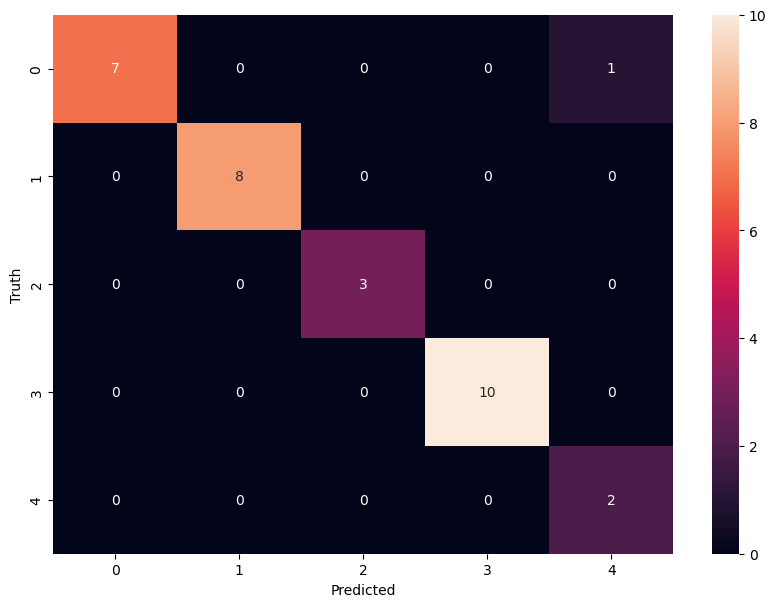

In [102]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [103]:
class_dict

{'dasun_shanaka': 0,
 'kusal_mendis': 1,
 'mahesh_thekshana': 2,
 'pathum_nissanka': 3,
 'wanindu_hasaranga': 4}

In [104]:
# Save the model

In [105]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [106]:
# Save class dictionary

In [107]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))